<a href="https://colab.research.google.com/github/Ripcodes/coder.github.io/blob/main/CrimeRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘ipred’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("clustMixType")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

In [ ]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
library(clustMixType)

In [ ]:
data <- read.csv("Not_murder_victim_age_sex.csv")

In [ ]:
summary(data)

  Area_Name              Year      Sub_Group_Name     Victims_Above_50_Yrs
 Length:936         Min.   :2001   Length:936         Length:936          
 Class :character   1st Qu.:2003   Class :character   Class :character    
 Mode  :character   Median :2006   Mode  :character   Mode  :character    
                    Mean   :2006                                          
                    3rd Qu.:2008                                          
                    Max.   :2010                                          
 Victims_Total      Victims_Upto_10_15_Yrs Victims_Upto_10_Yrs
 Length:936         Length:936             Length:936         
 Class :character   Class :character       Class :character   
 Mode  :character   Mode  :character       Mode  :character   
                                                              
                                                              
                                                              
 Victims_Upto_15_18_Yrs Victims_Up

In [ ]:
str(data)

'data.frame':	936 obs. of  10 variables:
 $ Area_Name             : chr  "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ Year                  : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ Sub_Group_Name        : chr  "1. Male Victims" "1. Male Victims" "1. Male Victims" "1. Male Victims" ...
 $ Victims_Above_50_Yrs  : chr  "17" "1" "2" "20" ...
 $ Victims_Total         : chr  "144" "6" "38" "232" ...
 $ Victims_Upto_10_15_Yrs: chr  "3" "0" "0" "3" ...
 $ Victims_Upto_10_Yrs   : chr  "1" "0" "0" "0" ...
 $ Victims_Upto_15_18_Yrs: chr  "5" "0" "0" "19" ...
 $ Victims_Upto_18_30_Yrs: chr  "54" "3" "20" "116" ...
 $ Victims_Upto_30_50_Yrs: chr  "64" "2" "16" "74" ...


In [ ]:
colSums(is.na(data))

Area_Name                   Year         Sub_Group_Name 
                     0                      0                      0 
  Victims_Above_50_Yrs          Victims_Total Victims_Upto_10_15_Yrs 
                     0                      0                      0 
   Victims_Upto_10_Yrs Victims_Upto_15_18_Yrs Victims_Upto_18_30_Yrs 
                     0                      0                      0 
Victims_Upto_30_50_Yrs 
                     0

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘car’, ‘rstatix’




In [ ]:
library(ggplot2)

In [ ]:
library(ggpubr)

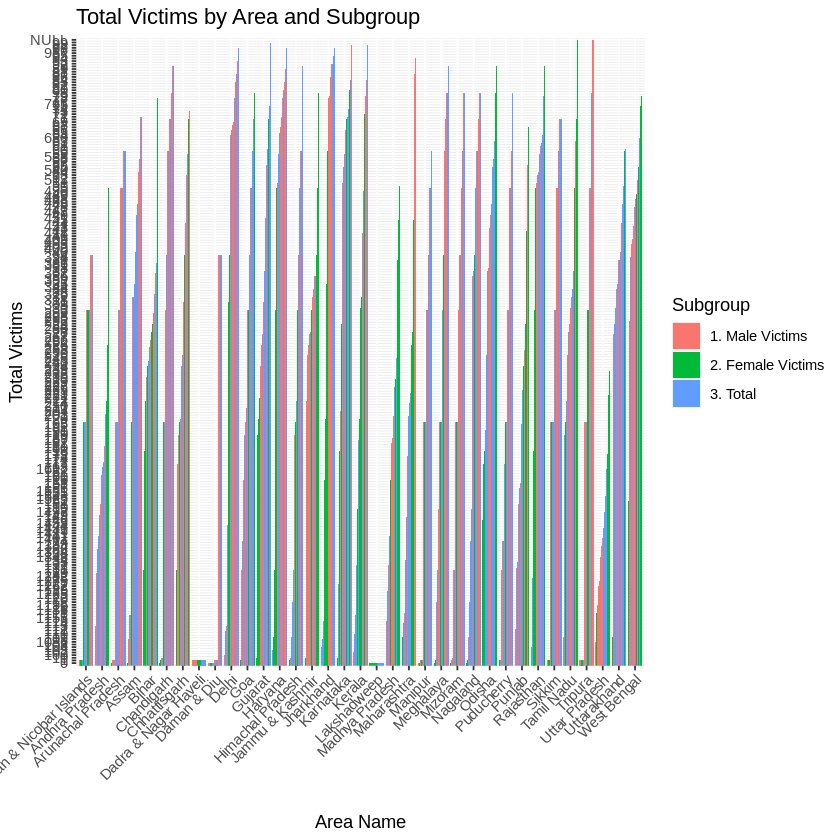

In [ ]:
ggplot(data, aes(x = Area_Name, y = Victims_Total, fill = Sub_Group_Name)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Total Victims by Area and Subgroup", x = "Area Name", y = "Total Victims", fill = "Subgroup")

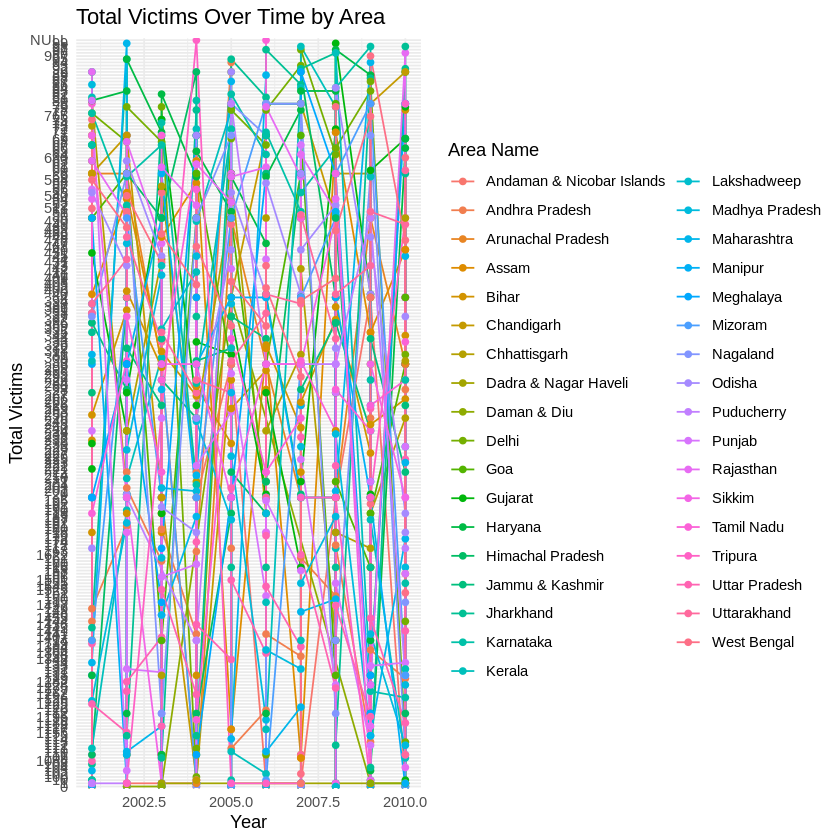

In [ ]:
# Assuming 'Year' is the variable for time
ggplot(data, aes(x = Year, y = Victims_Total, color = Area_Name, group = Area_Name)) +
  geom_line() +
  geom_point() +
  labs(title = "Total Victims Over Time by Area", x = "Year", y = "Total Victims", color = "Area Name") +
  theme_minimal()


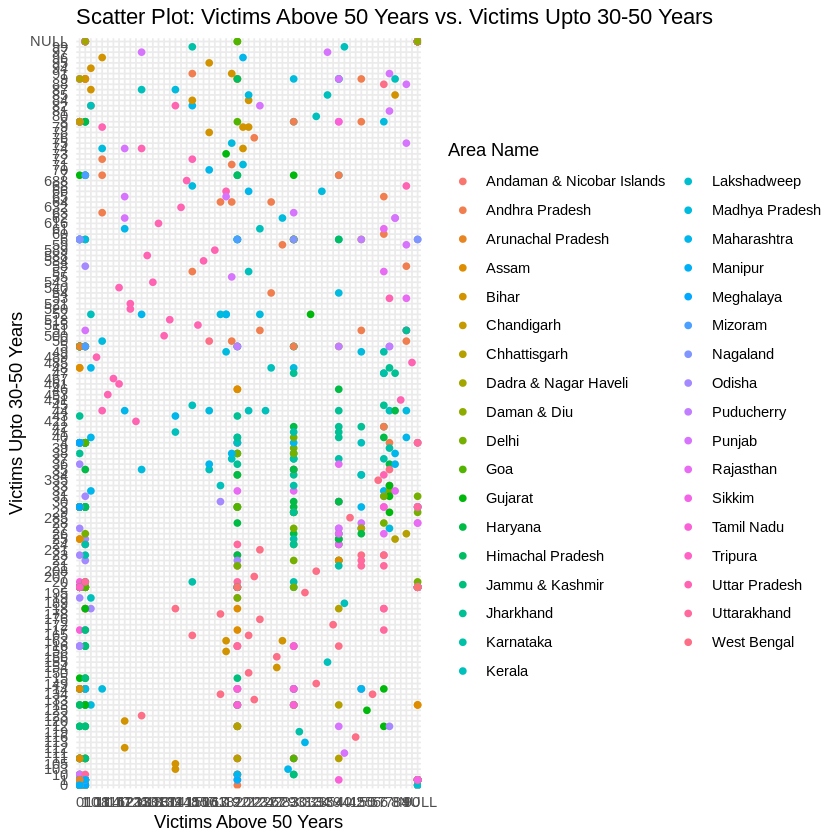

In [ ]:
# Scatter plot for Victims Above 50 Years vs. Victims Upto 30-50 Years
ggplot(data, aes(x = Victims_Above_50_Yrs, y = Victims_Upto_30_50_Yrs, color = Area_Name)) +
  geom_point() +
  labs(title = "Scatter Plot: Victims Above 50 Years vs. Victims Upto 30-50 Years",
       x = "Victims Above 50 Years", y = "Victims Upto 30-50 Years", color = "Area Name") +
  theme_minimal()


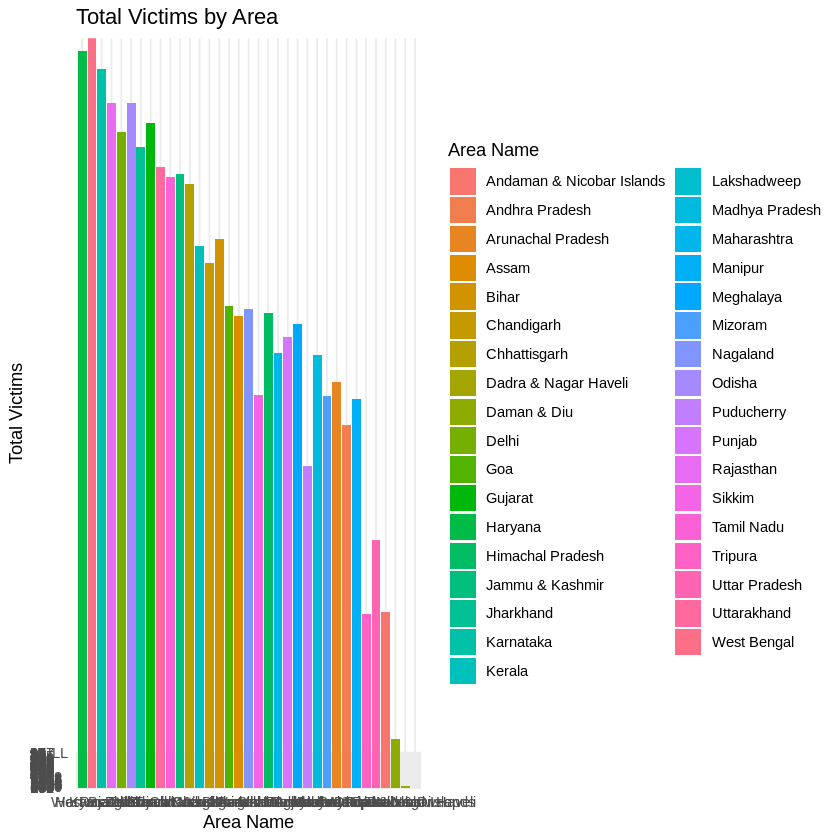

In [ ]:
# Horizontal bar plot for Total Victims by Area
ggplot(data, aes(x = reorder(Area_Name, desc(Victims_Total)), y = Victims_Total, fill = Area_Name)) +
  geom_col() +
  labs(title = "Total Victims by Area", x = "Area Name", y = "Total Victims", fill = "Area Name") +
  theme_minimal() +
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust = 0.5))


In [ ]:
set.seed(123)
trainIndex <- createDataPartition(data$Sub_Group_Name, p = 0.8, list = FALSE)
train_data <- data[trainIndex, ]
test_data <- data[-trainIndex, ]

In [ ]:
predictors <- subset(train_data, select = -c(Sub_Group_Name))

In [ ]:
model <- glmnet(as.matrix(predictors), as.factor(train_data$Sub_Group_Name), family = "multinomial")

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


In [ ]:
library(glmnet)

In [ ]:
model <- glmnet(as.matrix(predictors), as.factor(train_data$Sub_Group_Name), family = "multinomial")


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


In [ ]:
# Make predictions on the test set
predictions <- as.factor(predict(model, newx = as.matrix(test_data[, -which(names(test_data) == "Sub_Group_Name")]), type = "class"))


Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
“NAs introduced by coercion”


In [ ]:
# Make predictions on the test set
predictions <- as.factor(predict(model, newx = as.matrix(test_data[, -which(names(test_data) == "Sub_Group_Name")]), type = "class"))


Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
“NAs introduced by coercion”


In [ ]:
numeric_data <- select_if(data, is.numeric)

In [ ]:
k <- 3  # You can choose the number of clusters
kmeans_model <- kmeans(numeric_data, centers = k)

In [ ]:
data$Cluster <- kmeans_model$cluster

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


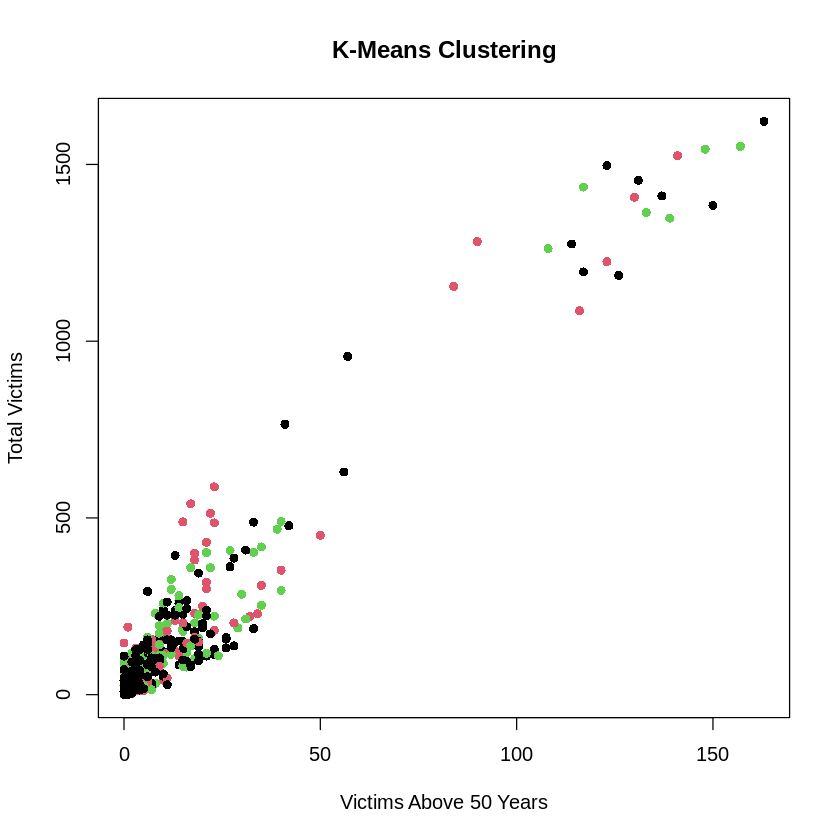

In [ ]:
plot(data$Victims_Above_50_Yrs, data$Victims_Total, col = data$Cluster, pch = 16, main = "K-Means Clustering", xlab = "Victims Above 50 Years", ylab = "Total Victims")

In [ ]:
write.csv(data, "clustered_crime_data.csv", row.names = FALSE)